# Train the RBM on ising model rotated Ising Model Configurations:

In [13]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies
from scipy.integrate import odeint

In [104]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/11_exactlySymmetricTraining.db')

In [5]:
import dill
dill.load_session('./data_bruckner/data/notebookData/11_exactlySymmetricTraining.db')

In [35]:
N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = np.zeros([Num_configs,N])
data_master = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=10,Nstep=200) # N steps.
roll_index = np.random.randint(0,N,Num_configs)

#Generate data by randomly rolling the array. There may be repetitions of the data since num of samples are much larger than the number of spins
for i in range(Num_configs):
    data[i] = np.roll(data_master[8],roll_index[i])

In [36]:
%%capture capt1
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

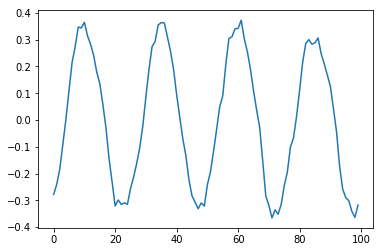

In [46]:
plt.plot(np.roll(np.array(results['W'])[100,0],-0))

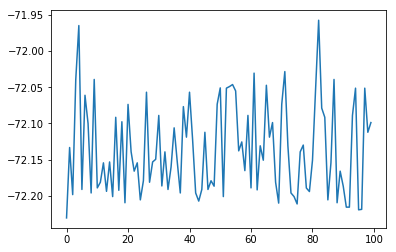

In [71]:
plt.plot(RBM.likelihood(data)[0:100])

## Find the solution to the equation starting from these initial conditions

In [28]:
def Remi_Moshir(y,t):
    dydt = (np.roll(y,1) + np.roll(y,-1)) + (y**3 - y*np.sum(y**2))
    return 0.001*dydt

init_cond = np.array(results['W'])[-1,0]
time_int = np.linspace(0,50000,10000)
sol1 = odeint(Remi_Moshir,init_cond,time_int) 

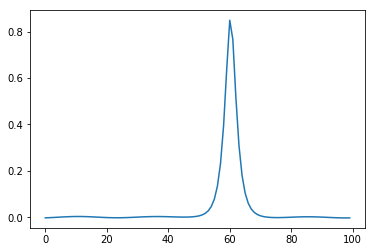

In [30]:
plt.plot(sol1[-1,:])

In [ ]:
plt.plot

## Two hidden units:

In [43]:
%%capture capt2
#Supress the output of the cell and save it to capt1

#Train the model
RBM2 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results2 = RBM2.fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

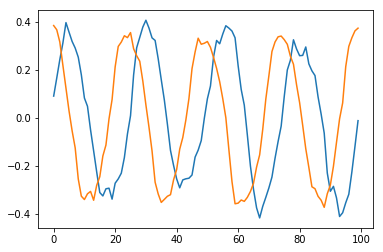

In [55]:
plt.plot(np.roll(np.array(results2['W'])[90,0],-0))
plt.plot(np.roll(np.array(results2['W'])[90,1],-0))

## Small Beta:

In [68]:
N = 100
beta2 = 0.1
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM2 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM2.layer.couplings =  beta2* (np.eye(N=N,k=1) + np.eye(N=N,k=-1))
BM2.layer.couplings[0,-1] += beta2
BM2.layer.couplings[-1,0] += beta2

data2 = np.zeros([Num_configs,N])
data_master2 = BM2.gen_data(Nchains=1,Nthermalize=0,Lchains=10,Nstep=200) # N steps.
roll_index2 = np.random.randint(0,N,Num_configs)

#Generate data by randomly rolling the array. There may be repetitions of the data since num of samples are much larger than the number of spins
for i in range(Num_configs):
    data2[i] = np.roll(data_master2[8],roll_index2[i])

In [69]:
%%capture capt3
#Supress the output of the cell and save it to capt1

#Train the model
RBM3 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results3 = RBM.fit(data2,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

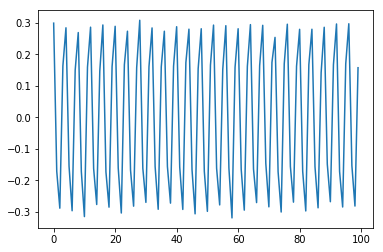

In [78]:
plt.plot(np.roll(np.array(results3['W'])[-1,0],-0))

In [39]:
def Remi_Moshir(y,t):
    dydt = (np.roll(y,1) + np.roll(y,-1)) + (y**3 - y*np.sum(y**2))
    return dydt

init_cond = np.array(results3['W'])[-1,0]
time_int = np.linspace(0,50000,10000)
sol2 = odeint(Remi_Moshir,init_cond,time_int)

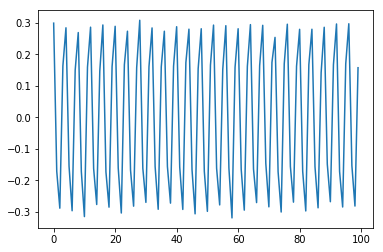

In [46]:
plt.plot(sol2[1,:])

In [79]:
%%capture capt4
#Supress the output of the celldef Remi_Moshir(y,t):
    dydt = (np.roll(y,1) + np.roll(y,-1)) + (y**3 - y*np.sum(y**2))
    return 0.001*dydt

init_cond = np.array(results['W'])[-1,0]
time_int = np.linspace(0,50000,10000)
sol1 = odeint(Remi_Moshir,init_cond,time_int)  and save it to capt1

#Train the model
RBM4 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results4 = RBM2.fit(data2,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

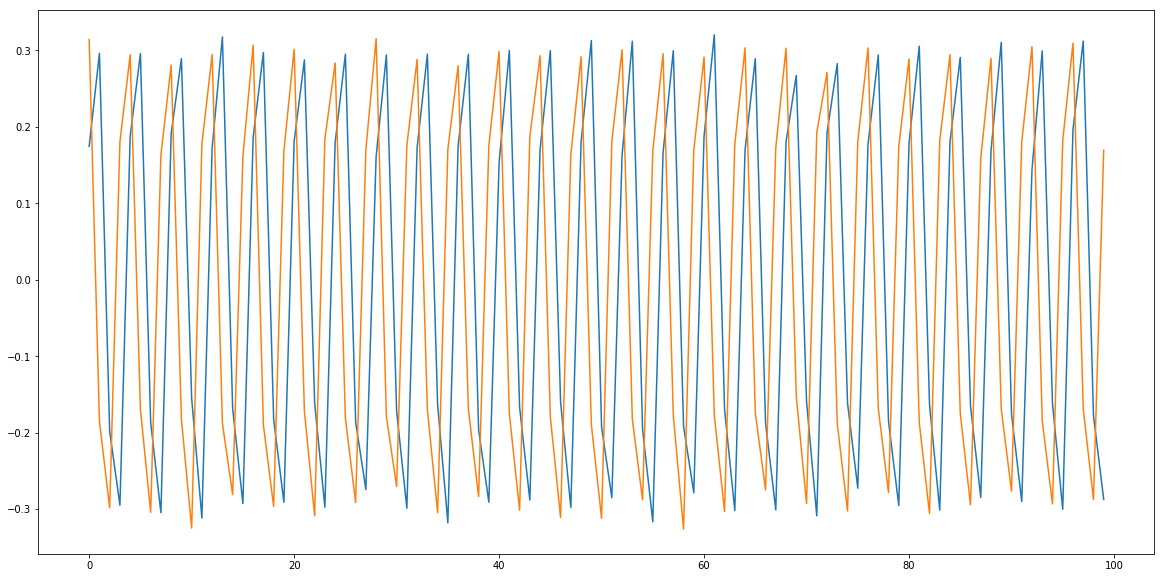

In [83]:
plt.figure(figsize=(20,10))
plt.plot(np.roll(np.array(results4['W'])[-1,0],-0))
plt.plot(np.roll(np.array(results4['W'])[-1,1],-0))

In [100]:
def Remi_Moshir2(y,t):
    dydt = np.zeros(len(y))
    dydt[0:len(y)/2] = (np.roll(y[0:len(y)/2],1) + np.roll(y[0:len(y)/2],-1) + (y[0:len(y)/2]**3 - y[0:len(y)/2]*np.sum(y[0:len(y)/2]**2)) + y[0:len(y)/2]*(y[len(y)/2:]**2) - y[len(y)/2:]*np.sum(y[0:len(y)/2]*y[len(y)/2:]))
    dydt[len(y)/2:] = (np.roll(y[len(y)/2:],1) + np.roll(y[len(y)/2:],-1) + (y[len(y)/2:]**3 - y[len(y)/2:]*np.sum(y[len(y)/2:]**2)) + y[len(y)/2:]*(y[0:len(y)/2])**2 - y[0:len(y)/2]*np.sum(y[0:len(y)/2]*y[len(y)/2:]))
    return dydt


In [101]:
init_cond3 = 0.5*np.random.randn(2*100)
init_cond3[0:len(init_cond3)/2] = np.array(results4['W'])[-1,0]
init_cond3[len(init_cond3)/2:] = np.array(results4['W'])[-1,0]
time_int = np.linspace(0,100000,10000)
sol3 = odeint(Remi_Moshir2,init_cond3,time_int)

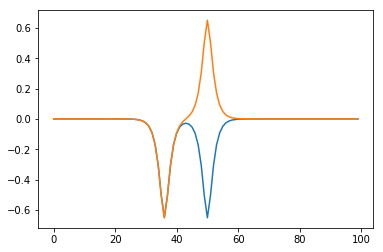

In [102]:
plt.plot(sol3[-1,0:len(init_cond3)/2])
plt.plot(sol3[-1,len(init_cond3)/2:])